In [1]:
# The code was removed by Watson Studio for sharing.

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-23T23:44:07.000,43874954,GENERAL,10452.0,1055 JEROME AVENUE,JEROME AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.832955,-73.925212,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-23T22:45:58.000,43874034,APPLIANCE,11225.0,441 BROOKLYN AVENUE,BROOKLYN AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.664148,-73.945460,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-23T05:27:25.000,43870498,WATER LEAK,11102.0,24-35 CRESCENT STREET,CRESCENT STREET,ADDRESS,Astoria,The following complaint conditions are still o...,QUEENS,40.774266,-73.919941,NaN,RESIDENTIAL BUILDING,Open
3,2019-09-23T07:47:31.000,43869804,PLUMBING,11216.0,778 LINCOLN PLACE,LINCOLN PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.670773,-73.951024,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-23T22:02:53.000,43871130,GENERAL,11228.0,1405 70 STREET,70 STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.621583,-74.001877,NaN,RESIDENTIAL BUILDING,Open


# Obtain data and explore
#Read CSV input file into a Dataframe
#Download data only for relevant columns so that the data volume is manageable

In [20]:
# Verify our column selection
df_data_1.columns

Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')

In [2]:
col = ['borough', 'city', 'complaint_type', 'created_date', 'incident_address', 'incident_zip', 'latitude', 
       'location_type', 'longitude', 'street_name', 'unique_key', 'status']

In [3]:
df_data_1.columns

Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')

In [ ]:
# New York City Open Data data file web site indicated that the complaint type "HEAT/HOT Water" was renamed from "HEATING" after 2014. So we should combine these two types into one.

In [4]:
# Check the dataframe's "before" complaint counts
df_data_1['complaint_type'].value_counts()

HEAT/HOT WATER            1152173
HEATING                    887869
PLUMBING                   703354
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       438182
PAINT - PLASTER            361258
PAINT/PLASTER              341577
ELECTRIC                   303834
NONCONST                   260890
DOOR/WINDOW                200360
WATER LEAK                 188142
GENERAL                    146746
FLOORING/STAIRS            135528
APPLIANCE                  110021
HPD Literature Request      52830
SAFETY                      50182
OUTSIDE BUILDING             7038
ELEVATOR                     6466
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complain

In [5]:
# Combine the Heating complaints with Heat/Hot Water
df_data_1['complaint_type'] = np.where(df_data_1['complaint_type']=='HEATING','HEAT/HOT WATER',df_data_1['complaint_type'])

In [ ]:
# Then, let's see the top complaints once again after combining the Heating category

In [6]:
# Check the dataframe's "after" complaint counts
df_data_1['complaint_type'].value_counts()

HEAT/HOT WATER            2040042
PLUMBING                   703354
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       438182
PAINT - PLASTER            361258
PAINT/PLASTER              341577
ELECTRIC                   303834
NONCONST                   260890
DOOR/WINDOW                200360
WATER LEAK                 188142
GENERAL                    146746
FLOORING/STAIRS            135528
APPLIANCE                  110021
HPD Literature Request      52830
SAFETY                      50182
OUTSIDE BUILDING             7038
ELEVATOR                     6466
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complaint_type, dtype: int64

In [ ]:
# Filter the Data Set by the answer from Question 1.

# We will use the answer of Heat/Hot Water


In [7]:
# Filter out Heat/Hot Water complaints and verify the result
df_data_h = df_data_1[df_data_1.complaint_type=='HEAT/HOT WATER'].reset_index(drop = True)
df_data_h['complaint_type'].value_counts()

HEAT/HOT WATER    2040042
Name: complaint_type, dtype: int64

In [8]:
# Check a few rows
df_data_h.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-23T22:37:17.000,43873132,HEAT/HOT WATER,10457.0,1711 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.844521,-73.909411,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-23T22:33:12.000,43870442,HEAT/HOT WATER,11213.0,1465 PROSPECT PLACE,PROSPECT PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.673091,-73.927514,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-23T06:21:40.000,43874704,HEAT/HOT WATER,10458.0,200 EAST 205 STREET,EAST 205 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.874962,-73.884272,2019-09-23T21:29:00.000,RESIDENTIAL BUILDING,Closed
3,2019-09-23T06:36:46.000,43871051,HEAT/HOT WATER,10031.0,550 WEST 146 STREET,WEST 146 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.826485,-73.948510,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-23T09:07:25.000,43873578,HEAT/HOT WATER,11213.0,1054 PARK PLACE,PARK PLACE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.673012,-73.942803,2019-09-23T19:55:24.000,RESIDENTIAL BUILDING,Closed


In [9]:
# Check column counts
df_data_h.count()

created_date              2040042
unique_key                2040042
complaint_type            2040042
incident_zip              2021072
incident_address          2040041
street_name               2040041
address_type              2022046
city                      2021199
resolution_description    2039846
borough                   2040042
latitude                  2021076
longitude                 2021076
closed_date               2025276
location_type             2040042
status                    2040042
dtype: int64

In [10]:
# Let's create another dataframe with only rows that have non-null values for 'incident_zip'
df_data_hz = df_data_h.dropna(subset = ['incident_zip'])
df_data_hz.count()

created_date              2021072
unique_key                2021072
complaint_type            2021072
incident_zip              2021072
incident_address          2021072
street_name               2021072
address_type              2021072
city                      2021072
resolution_description    2020893
borough                   2021072
latitude                  2021072
longitude                 2021072
closed_date               2006529
location_type             2021072
status                    2021072
dtype: int64

In [11]:
# Let's cast the zip datatype so it looks pretty; then check it
df_data_hz = df_data_hz[df_data_hz['incident_zip'].notnull()].copy()
#df311hz.loc[:, 'incident_zip'] = df311hz['incident_zip'].astype(int).astype(str)
df_data_hz.loc[:, 'incident_zip'] = df_data_hz['incident_zip'].astype(int)
df_data_hz.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-23T22:37:17.000,43873132,HEAT/HOT WATER,10457,1711 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.844521,-73.909411,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-23T22:33:12.000,43870442,HEAT/HOT WATER,11213,1465 PROSPECT PLACE,PROSPECT PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.673091,-73.927514,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-23T06:21:40.000,43874704,HEAT/HOT WATER,10458,200 EAST 205 STREET,EAST 205 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.874962,-73.884272,2019-09-23T21:29:00.000,RESIDENTIAL BUILDING,Closed
3,2019-09-23T06:36:46.000,43871051,HEAT/HOT WATER,10031,550 WEST 146 STREET,WEST 146 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.826485,-73.948510,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-23T09:07:25.000,43873578,HEAT/HOT WATER,11213,1054 PARK PLACE,PARK PLACE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.673012,-73.942803,2019-09-23T19:55:24.000,RESIDENTIAL BUILDING,Closed


# Draw conclusions


In [ ]:
#Count the number of ALL Heating/Hot Water Complaints by Borough, sorted Descending

In [12]:
# This is using the dataframe that includes nulls for incident_zip
borough311 = df_data_h.groupby(['borough']) \
    .size() \
    .nlargest(50) \
    .reset_index(name='count') \
    .sort_values('count', ascending=False)
borough311

,borough,count
0,BRONX,569846
1,BROOKLYN,542994
2,MANHATTAN,398472
3,Unspecified,282917
4,QUEENS,228399
5,STATEN ISLAND,17414


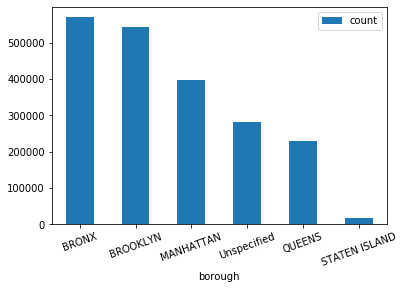

In [13]:
# Chart it!
borough311.plot(x = 'borough', kind = 'bar', rot= 20)

# We can conclude that the Bronx has the most incidents, followed closely by Brooklyn


In [ ]:
#Count the number of ALL Heating/Hot Water Complaints by Borough and Zip, Top 20 sorted Descending

In [14]:
# This is using the dataframe that dropped rows with Null in incident_zip
zip311 = df_data_hz.groupby(['borough','incident_zip']) \
    .size() \
    .nlargest(20) \
    .reset_index(name='count') \
    .sort_values('count', ascending=False)
zip311

,borough,incident_zip,count
0,BROOKLYN,11226,56109
1,BRONX,10458,53848
2,BRONX,10467,53842
3,BRONX,10468,47489
4,BRONX,10453,46992
5,BRONX,10452,40945
6,BRONX,10457,37051
7,MANHATTAN,10031,36993
8,MANHATTAN,10040,36725
9,BRONX,10456,36092


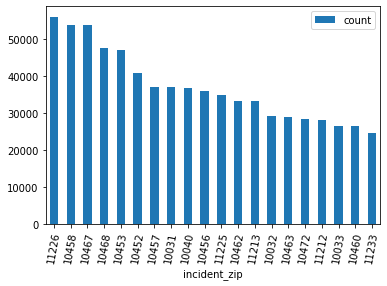

In [15]:
# Chart it!
zip311.plot(x = 'incident_zip', kind = 'bar', rot = 80)

# We can conclude that the 11226 has the most incidents, followed closely by 10458 and 10467


In [ ]:
# Count the number of ALL Heating/Hot Water Complaints by Borough & Address, Top 10 sorted Descending

In [16]:
# This is using the dataframe that dropped rows with Null in incident_zip
address311 = df_data_hz.groupby(['borough','incident_address']) \
    .size() \
    .nlargest(10) \
    .reset_index(name='count') \
    .sort_values('count', ascending=False)
address311

,borough,incident_address,count
0,MANHATTAN,34 ARDEN STREET,12139
1,QUEENS,89-21 ELMHURST AVENUE,10036
2,BRONX,3810 BAILEY AVENUE,7088
3,BRONX,1025 BOYNTON AVENUE,5760
4,BROOKLYN,9511 SHORE ROAD,4222
5,BRONX,2090 EAST TREMONT AVENUE,3661
6,BRONX,888 GRAND CONCOURSE,2990
7,BRONX,2968 PERRY AVENUE,2752
8,MANHATTAN,97 SHERMAN AVENUE,2503
9,QUEENS,72-10 41 AVENUE,2462


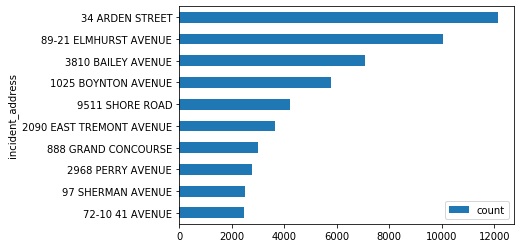

In [17]:
# Chart it!
addrplt=address311.sort_values(by='count', ascending = True)
addrplt.plot(x = 'incident_address', kind = 'barh', rot=0)

In [18]:
# A quick check of the top 10 addresses using the dataframe that included nulls yields identical results for the top 10, so the results are reliable
df_data_h.groupby(['borough','incident_zip',"incident_address"]) \
    .size() \
    .nlargest(10) \
    .reset_index(name='count') \
    .sort_values('count', ascending=False)

,borough,incident_zip,incident_address,count
0,MANHATTAN,10040.0,34 ARDEN STREET,12139
1,QUEENS,11373.0,89-21 ELMHURST AVENUE,10036
2,BRONX,10463.0,3810 BAILEY AVENUE,7088
3,BRONX,10472.0,1025 BOYNTON AVENUE,5760
4,BROOKLYN,11209.0,9511 SHORE ROAD,4222
5,BRONX,10462.0,2090 EAST TREMONT AVENUE,3661
6,BRONX,10451.0,888 GRAND CONCOURSE,2990
7,BRONX,10458.0,2968 PERRY AVENUE,2752
8,MANHATTAN,10034.0,97 SHERMAN AVENUE,2503
9,QUEENS,11377.0,72-10 41 AVENUE,2462


# Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

For This Question we will use the answer of Heat/Hot Water
# Answer

The Borough that should be focused on for complaints is the Bronx (569,846) followed closely by Brooklyn (542,994)

The Zip that should be focused on for complaints is 11226 (Brooklyn; 56,109), followed closely by 10458 (Bronx; 53,848) and 10467 (Bronx; 53,842). There is a decline with subsequent Zip codes.

0 	BROOKLYN 	11226 	56109
1 	BRONX 	    10458 	53848
2 	BRONX 	    10467 	53842

The Street that should be focused on is the 34 Arden Street (Manhattan; 12,139), followed by 89-21 Elmhurst Avenue (Queens; 10,036). T


Other Observations
Manhattan and Queens merely have a single address where they should provide additional focus on complaint resolution.

The Bronx borough has over half the top 20 zip codes producing the most complaints. Additional resources/enforcement might be necessary to address HEAT/HOT WATER complaints with the landlords.
